<a href="https://colab.research.google.com/github/who-am-i-h/AI-vision/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install flask
!pip install matplotlib
!pip install tensorflow

In [2]:
from google.colab import files

files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"whoamiishi","key":"a7415d0a49510f7fbd66444b882117f8"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


In [4]:
!chmod 600 ~/.kaggle/kaggle.json


In [5]:
!kaggle datasets download -d abhranta/brain-tumor-detection-mri


Dataset URL: https://www.kaggle.com/datasets/abhranta/brain-tumor-detection-mri
License(s): unknown
 96% 62.0M/64.3M [00:04<00:00, 24.4MB/s]
100% 64.3M/64.3M [00:04<00:00, 16.1MB/s]


In [6]:
import zipfile
import os

with zipfile.ZipFile('/content/brain-tumor-detection-mri.zip', 'r') as zip_ref:
    zip_ref.extractall('brain_data')

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout



In [20]:
# Set up the base directory for training and validation
 # Replace with your actual dataset path
base_dir = '/content/brain_data/Brain_Tumor_Detection'
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.15
)

train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    classes=['yes', 'no'],  # Only include 'yes' and 'no' for training
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    classes=['yes', 'no'],  # Only include 'yes' and 'no' for validation
    class_mode='binary',
    subset='validation'
)


Found 2550 images belonging to 2 classes.
Found 450 images belonging to 2 classes.


In [19]:
# print(len(os.listdir(base_dir + "/yes")))
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout to reduce overfitting
    Dense(1, activation='sigmoid')  # Binary output
])



In [17]:
# from tensorflow.keras.callbacks import EarlyStopping

# early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [22]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # Binary classification
    metrics=['accuracy']
)


In [23]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,  # Start with 20 epochs; adjust as needed
    verbose=1
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


80/80 ━━━━━━━━━━━━━━━━━━━━ 29s 258ms/step - accuracy: 0.5440 - loss: 0.7271 - val_accuracy: 0.6267 - val_loss: 0.6335
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 31s 196ms/step - accuracy: 0.6813 - loss: 0.5934 - val_accuracy: 0.6667 - val_loss: 0.6284
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 192ms/step - accuracy: 0.7056 - loss: 0.5586 - val_accuracy: 0.6911 - val_loss: 0.5926
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 189ms/step - accuracy: 0.7406 - loss: 0.5523 - val_accuracy: 0.7000 - val_loss: 0.5891
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 196ms/step - accuracy: 0.7457 - loss: 0.5342 - val_accuracy: 0.6756 - val_loss: 0.5933
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 196ms/step - accuracy: 0.7383 - loss: 0.5275 - val_accuracy: 0.7267 - val_loss: 0.5693
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 22s 218ms/step - accuracy: 0.7401 - loss: 0.5228 - val_accuracy: 0.7511 - val_loss: 0.5244
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 17s 198ms/step - accuracy: 0.7565 - loss: 0.5086 - val_accuracy: 0.746

In [24]:
# Directory for prediction images
pred_dir = f'{base_dir}/pred'

# Load images from pred folder for prediction purposes
pred_generator = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    pred_dir,
    target_size=(128, 128),
    batch_size=1,
    class_mode=None,  # No labels since this is for prediction
    shuffle=False
)


Found 0 images belonging to 0 classes.


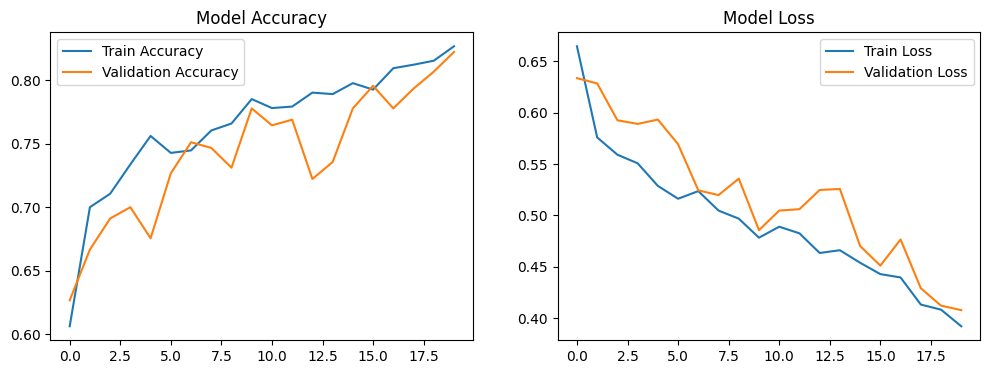

In [25]:
# Plot training & validation accuracy and loss
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))


# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')

plt.show()


In [26]:
model.save('brain_tumor_detection_model.h5')


In [28]:
from tensorflow.keras.preprocessing import image
import numpy as np


def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# Example usage:
img_path = '/content/brain_data/Brain_Tumor_Detection/no/no0.jpg'
img_array = preprocess_image(img_path)
prediction = model.predict(img_array)
if prediction[0] > 0.5:
    print("Prediction: no Tumor Detected")
else:
    print("Prediction: Tumor Detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 635ms/step
Prediction: no Tumor Detected


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,  # Start with 20 epochs; adjust as needed
    verbose=1
)
